In [1]:
# Reload the labels dataset to filter for keywords related to shares outstanding or other equity-related metrics
# This approach aims to identify labels that might be relevant to studying changes in equity metrics over time.

import pandas as pd

# Reload the labels dataset
label_file_path = '/Users/ulricazhang/Downloads/CISC372/FNXL-main/labelCount.csv'
labels_data = pd.read_csv(label_file_path, header=None)  # Assuming the file has no header based on previous output

# Assign column names for clarity
labels_data.columns = ['Index', 'Label', 'Count']

# Convert labels to lowercase for case-insensitive matching
labels_data['Lowercase Labels'] = labels_data['Label'].str.lower()

# Define a list of keywords related to shares outstanding or equity-related metrics
equity_keywords = [
    'common stock', 'equity', 'share capital', 'stockholders\' equity', 'treasury stock',
    'diluted earnings per share', 'dividend', 'capital surplus', 'retained earnings',
    'book value', 'market capitalization', 'preferred stock', 'stock option',
    'repurchased shares', 'earnings per share – diluted', 'dividend payout',
    'dividends declared', 'additional paid-in capital', 'share premium',
    'retained profits', 'accumulated earnings', 'net book value', 'market value',
    'capitalization', 'preference shares', 'employee stock options', 'esop',
    'share based compensation', 'equity securities', 'equity issuance', 'equity repurchase',
    'equity dilution', 'equity distribution'
]

# Filter labels containing any of the equity-related keywords
equity_related_labels = labels_data[labels_data['Lowercase Labels'].apply(lambda x: any(keyword in x for keyword in equity_keywords))]

# equity_related_labels
all_labels_list = equity_related_labels['Label'].tolist()
# print(repr(all_labels_list))

In [2]:
# Load the datasets
dev_sample_path = '/Users/ulricazhang/Downloads/CISC372/FNXL-main/dev_sample.csv' # change the path
test_sample_path = '/Users/ulricazhang/Downloads/CISC372/FNXL-main/test_sample.csv'
train_sample_path = '/Users/ulricazhang/Downloads/CISC372/FNXL-main/train_sample.csv'

dev_sample = pd.read_csv(dev_sample_path)
test_sample = pd.read_csv(test_sample_path)
train_sample = pd.read_csv(train_sample_path)

# Merge the three datasets into one
merged_dataset = pd.concat([train_sample, dev_sample, test_sample], ignore_index=True)

# Display the shape of the merged dataset to verify
print("Shape of merged dataset:", merged_dataset.shape)

# Display the first few rows of the merged dataset
merged_dataset.head()

Shape of merged dataset: (2973, 9)


,sentence,numerals-tags,company,docEndDate,docType,fileName,year,ner_tags,tokens
0,"During the years ended December 31, 2020 and 2...",{'us-gaap:GeneralAndAdministrativeExpense': ['...,ANNALY CAPITAL MANAGEMENT INC,"December 31, 2020",10-K,/home/soumyasharma/HULK/financial/FinNumRED/da...,21,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","['During', 'the', 'years', 'ended', 'December'..."
1,The Operating Partnership incurred expenses pu...,{'us-gaap:RelatedPartyTransactionSellingGenera...,MGM Growth Properties LLC,"December 31, 2020",10-K,/home/soumyasharma/HULK/financial/FinNumRED/da...,21,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","['The', 'Operating', 'Partnership', 'incurred'..."
2,Amounts reclassified from accumulated other co...,{'us-gaap:OtherComprehensiveIncomeLossReclassi...,COGNEX CORP,"December 31, 2019",10-K,/home/soumyasharma/HULK/financial/FinNumRED/da...,20,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","['Amounts', 'reclassified', 'from', 'accumulat..."
3,"During the year ended October31, 2016, Agilent...",{'us-gaap:CostMethodInvestmentsOriginalCost': ...,"Agilent Technologies, Inc.","October 31, 2019",10-K,/home/soumyasharma/HULK/financial/FinNumRED/da...,19,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","['During', 'the', 'year', 'ended', 'October31'..."
4,The remaining Assurant Employee Benefits unamo...,{'us-gaap:DisposalGroupDeferredGainOnDisposal'...,ASSURANT INC,2018-12-31,10-K,/home/soumyasharma/HULK/financial/FinNumRED/da...,19,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","['The', 'remaining', 'Assurant', 'Employee', '..."


In [3]:
equity_labels_list = equity_related_labels['Label']
# print(equity_labels_list)

In [4]:
import pandas as pd
import json

# Define a function to check if a row contains relevant numerals-tags and extract the entire row if it does
def check_and_extract_row(row, equity_labels_list):
    try:
        numerals_tags = json.loads(row['numerals-tags'].replace("'", "\""))  # Convert to valid JSON format
        for label in equity_labels_list:
            if label in numerals_tags and numerals_tags[label]:  # Checks if the label exists and has numeric values
                return True  # The row contains relevant numeric values and should be extracted
    except json.JSONDecodeError:
        pass
    return False

# Filter the merged_dataset for rows that contain relevant numerals-tags
filtered_dataset = merged_dataset[merged_dataset.apply(check_and_extract_row, axis=1, equity_labels_list=equity_labels_list)]

# filtered_dataset contains rows where numerals-tags have your specified equity-related labels with numeric values
# If you need to extract specific features from these rows, you can do so as follows
extracted_features = filtered_dataset[['company', 'docEndDate', 'docType', 'year', 'numerals-tags']]  

# Display the shape and first few rows of the filtered dataset with extracted features for verification
print("Shape of filtered dataset with extracted features:", extracted_features.shape)
extracted_features

Shape of filtered dataset with extracted features: (233, 5)


,company,docEndDate,docType,year,numerals-tags
56,Smartsheet Inc.,"January 31, 2020",10-K,20,{'us-gaap:TemporaryEquityDividendsAdjustment':...
92,"CONSTELLATION BRANDS, INC.","February 29, 2020",10-K,20,{'us-gaap:EquityMethodInvestmentQuotedMarketVa...
101,Cypress Semiconductor Corporation,"December 29, 2019",10-K,20,{'us-gaap:EquityMethodInvestmentOtherThanTempo...
110,"EOG RESOURCES, INC.","December 31, 2019",10-K,20,{'us-gaap:SharebasedCompensationArrangementByS...
133,V F CORP,"March 28, 2020",10-K,20,{'us-gaap:StockholdersEquityNoteSpinoffTransac...
...,...,...,...,...,...
2884,"CISCO SYSTEMS, INC.","July 25, 2020",10-K,20,{'us-gaap:EquitySecuritiesWithoutReadilyDeterm...
2898,CMS ENERGY CORPORATION,"December 31, 2019",10-K,20,{'us-gaap:PublicUtilitiesApprovedReturnOnEquit...
2901,"STANLEY BLACK & DECKER, INC.","December 28, 2019",10-K,20,{'us-gaap:ForwardContractIndexedToIssuersEquit...
2909,REGIONS FINANCIAL CORPORATION,"December 31, 2019",10-K,20,"{'us-gaap:EquitySecuritiesFvNi': ['450', '429']}"


/var/folders/_6/s0k4zqhd0_j70ztp6gds_ft00000gn/T/ipykernel_72995/1946495758.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extracted_features['docEndDate'] = pd.to_datetime(extracted_features['docEndDate'], format='%B %d, %Y', errors='coerce')


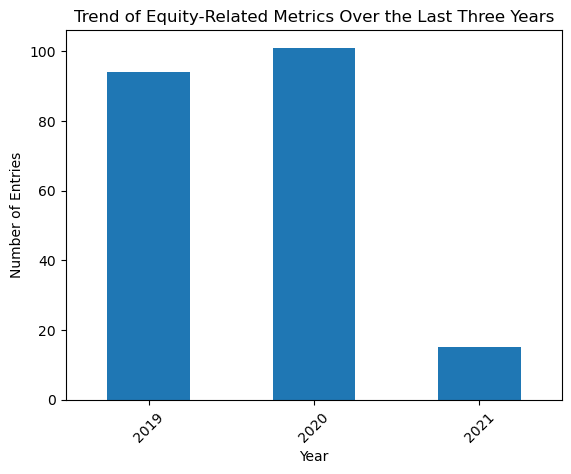

In [5]:
extracted_features['docEndDate'] = pd.to_datetime(extracted_features['docEndDate'], format='%B %d, %Y', errors='coerce')
extracted_features_sorted = extracted_features.sort_values(by='docEndDate')
latest_date = extracted_features_sorted['docEndDate'].max()
three_years_ago = latest_date - pd.DateOffset(years=2)
extracted_features_filtered = extracted_features_sorted[extracted_features_sorted['docEndDate'] >= three_years_ago]

yearly_counts = extracted_features_filtered.groupby(extracted_features_filtered['docEndDate'].dt.year).size()
import matplotlib.pyplot as plt

yearly_counts.plot(kind='bar')
plt.title('Trend of Equity-Related Metrics Over the Last Three Years')
plt.xlabel('Year')
plt.ylabel('Number of Entries')
plt.xticks(rotation=45)
plt.show()

In [6]:
import pandas as pd
import json

# Initialize an empty list to hold dictionaries for each row of new data
data_list = []

for index, row in extracted_features_filtered.iterrows():
    try:
        numerals_tags = json.loads(row['numerals-tags'].replace("'", "\""))     
        for label in equity_labels_list:
            if label in numerals_tags:
                for value in numerals_tags[label]:
                    # Remove commas and convert the value to float
                    numeric_value = float(value.replace(',', ''))
                    data_list.append({
                        'company': row['company'],
                        'year': "20" + str(row['year']),  # Append the 'year', ensuring it's a string
                        'metric': label,
                        'value': numeric_value,  # Value converted to float
                        'docEndDate': row['docEndDate']
                    })
    except ValueError:
        print(f"Error converting value {value} to float for company {row['company']} in year {row['year']}")

# Create a DataFrame from the list of dictionaries
extracted_metrics = pd.DataFrame(data_list)

# Convert 'docEndDate' to datetime and extract year
extracted_metrics['docEndDate'] = pd.to_datetime(extracted_metrics['docEndDate'], errors='coerce')
extracted_metrics['docYear'] = extracted_metrics['docEndDate'].dt.year
extracted_metrics['docYearMonth'] = extracted_metrics['docEndDate'].dt.year + extracted_metrics['docEndDate'].dt.month/100.0

# Ensure 'year' is in the correct data type for sorting and filtering
extracted_metrics['year'] = pd.to_numeric(extracted_metrics['year'], errors='coerce')
extracted_metrics

,company,year,metric,value,docEndDate,docYear,docYearMonth
0,WALT DISNEY CO/,2019,us-gaap:BusinessAcquisitionEquityInterestsIssu...,307.0,2019-09-28,2019,2019.09
1,WALT DISNEY CO/,2019,us-gaap:BusinessAcquisitionEquityInterestsIssu...,307.0,2019-09-28,2019,2019.09
2,WALT DISNEY CO/,2019,us-gaap:BusinessAcquisitionEquityInterestIssue...,33.8,2019-09-28,2019,2019.09
3,"NUANCE COMMUNICATIONS, INC.",2019,us-gaap:DebtInstrumentConvertibleCarryingAmoun...,156.4,2019-09-30,2019,2019.09
4,AMERISOURCEBERGEN CORP,2019,us-gaap:ShareBasedCompensationArrangementBySha...,1.2,2019-09-30,2019,2019.09
...,...,...,...,...,...,...,...
327,FACTSET RESEARCH SYSTEMS INC,2021,us-gaap:ShareBasedCompensationArrangementBySha...,62960.0,2021-08-31,2021,2021.08
328,FACTSET RESEARCH SYSTEMS INC,2021,us-gaap:ShareBasedCompensationArrangementBySha...,36424.0,2021-08-31,2021,2021.08
329,FACTSET RESEARCH SYSTEMS INC,2021,us-gaap:ShareBasedCompensationArrangementBySha...,36709.0,2021-08-31,2021,2021.08
330,FACTSET RESEARCH SYSTEMS INC,2021,us-gaap:ShareBasedCompensationArrangementBySha...,36888.0,2021-08-31,2021,2021.08


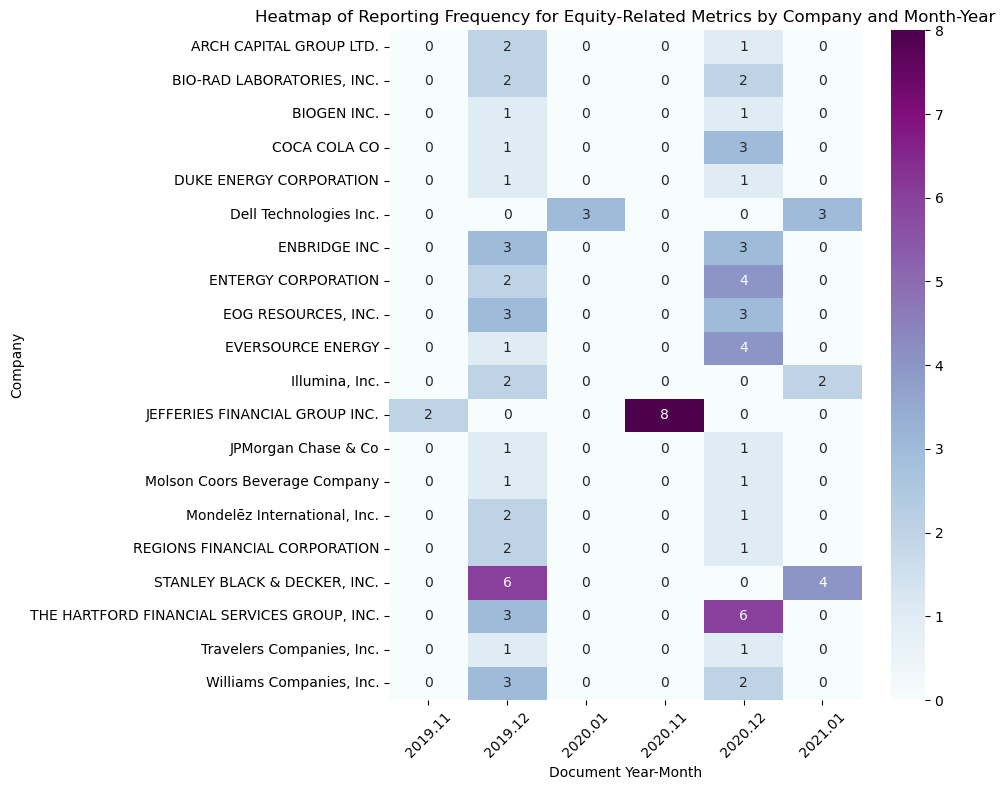

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter for consistent reporting
# Want companies with reports across multiple different years/months and multiple different metrics
consistent_reporting = extracted_metrics.groupby('company').filter(
    lambda x:  x['docYearMonth'].nunique() > 1
)

# Pivot table for heatmap using 'docYearMonth'
# Count the occurrences of metrics per 'docYearMonth' for each company
heatmap_data = consistent_reporting.pivot_table(
    index='company', 
    columns='docYearMonth', 
    values='metric', 
    aggfunc='count', 
    fill_value=0
)

# Generate heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap='BuPu', fmt='d')
plt.title('Heatmap of Reporting Frequency for Equity-Related Metrics by Company and Month-Year')
plt.xlabel('Document Year-Month')
plt.ylabel('Company')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

/var/folders/_6/s0k4zqhd0_j70ztp6gds_ft00000gn/T/ipykernel_72995/2985461475.py:28: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


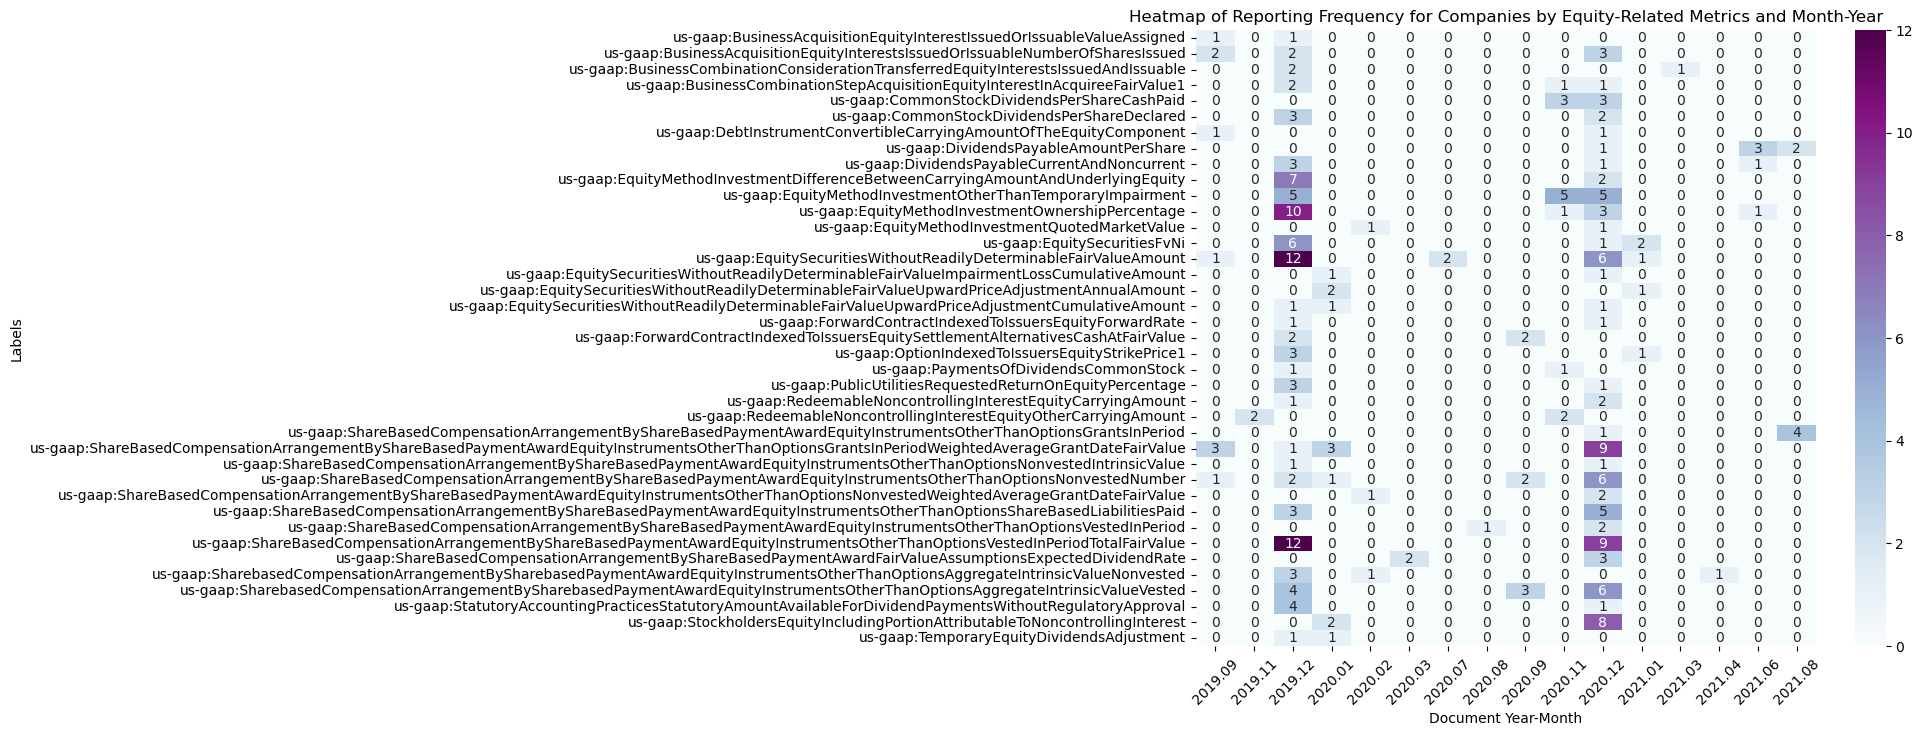

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter for consistent reporting
# Want companies with reports across multiple different years/months and multiple different metrics
consistent_reporting = extracted_metrics.groupby('metric').filter(
    lambda x:  x['docYearMonth'].nunique() > 1
)

# Pivot table for heatmap using 'docYearMonth'
# Count the occurrences of metrics per 'docYearMonth' for each company
heatmap_data = consistent_reporting.pivot_table(
    index='metric', 
    columns='docYearMonth', 
    values='company', 
    aggfunc='count', 
    fill_value=0
)

# Generate heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap='BuPu', fmt='d')
plt.title('Heatmap of Reporting Frequency for Companies by Equity-Related Metrics and Month-Year')
plt.xlabel('Document Year-Month')
plt.ylabel('Labels')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [9]:
import pandas as pd

years_of_interest = [2019, 2020, 2021]  # Specified years of interest

# Initialize a list to hold metrics that satisfy the condition
metrics_with_sufficient_data = []

for metric in equity_labels_list:
    filtered_data = extracted_metrics[(extracted_metrics['metric'] == metric) & 
                                      (extracted_metrics['docYear'].isin(years_of_interest))]

    # Initialize a dictionary to hold the count of non-NaN values for each year for the current metric
    non_nan_counts = {}

    for year in years_of_interest:
        non_nan_counts[year] = len(filtered_data[filtered_data['docYear'] == year]['value'].dropna())
    
    # Identify years with actual values for the current metric
    years_with_actual_values = [year for year, count in non_nan_counts.items() if count > 0]

    # Check if there are at least three years with actual (non-NaN) values
    if len(years_with_actual_values) >= 3:
        # If the metric satisfies the condition, add it to the list
        metrics_with_sufficient_data.append(metric)

# Display the metrics that satisfy the condition
print("Metrics with at least three years of actual (non-NaN) values:")
for metric in metrics_with_sufficient_data:
    print(metric)

Metrics with at least three years of actual (non-NaN) values:
us-gaap:EquitySecuritiesFvNi
us-gaap:SharebasedCompensationArrangementBySharebasedPaymentAwardEquityInstrumentsOtherThanOptionsAggregateIntrinsicValueNonvested
us-gaap:EquitySecuritiesWithoutReadilyDeterminableFairValueAmount
us-gaap:DividendsPayableCurrentAndNoncurrent
us-gaap:EquityMethodInvestmentOwnershipPercentage


In [10]:
# These five metrics at least three years of actual (non-NaN) values:

# metric_name = 'us-gaap:EquityMethodInvestmentOwnershipPercentage'
# metric_name = 'us-gaap:EquitySecuritiesFvNi'
# metric_name = 'us-gaap:SharebasedCompensationArrangementBySharebasedPaymentAwardEquityInstrumentsOtherThanOptionsAggregateIntrinsicValueNonvested'
metric_name = 'us-gaap:EquitySecuritiesWithoutReadilyDeterminableFairValueAmount'
# metric_name = 'us-gaap:DividendsPayableCurrentAndNoncurrent'

# Filter the DataFrame for the chosen metric
df_metric = extracted_metrics[extracted_metrics['metric'] == metric_name]

# Aggregate the data if there are multiple entries for the same company in the same year
df_metric_agg = df_metric.groupby(['company', 'docYear'])['value'].mean().reset_index()

# Pivot without errors because each company-year combination is unique
df_metric_pivot = df_metric_agg.pivot(index='company', columns='docYear', values='value')

df_metric_pivot

docYear,2019,2020,2021
company,,,
AMC Networks Inc.,52.866667,NaN,NaN
"BIO-RAD LABORATORIES, INC.",0.450000,0.40,NaN
"CISCO SYSTEMS, INC.",NaN,0.65,NaN
Dell Technologies Inc.,NaN,NaN,990.0
"EAST WEST BANCORP, INC.",NaN,21.40,NaN
"EXPEDIA GROUP, INC.",350.000000,NaN,NaN
Ford Motor Co,NaN,400.00,NaN
"Illumina, Inc.",225.500000,NaN,NaN
"Merck & Co., Inc.",494.000000,NaN,NaN


docYear        2019       2020   2021
count      7.000000    5.00000    1.0
mean     270.695238   86.29000  990.0
std      267.820682  175.57742    NaN
min        0.450000    0.40000  990.0
25%       51.708333    0.65000  990.0
50%      225.500000    9.00000  990.0
75%      422.000000   21.40000  990.0
max      721.500000  400.00000  990.0


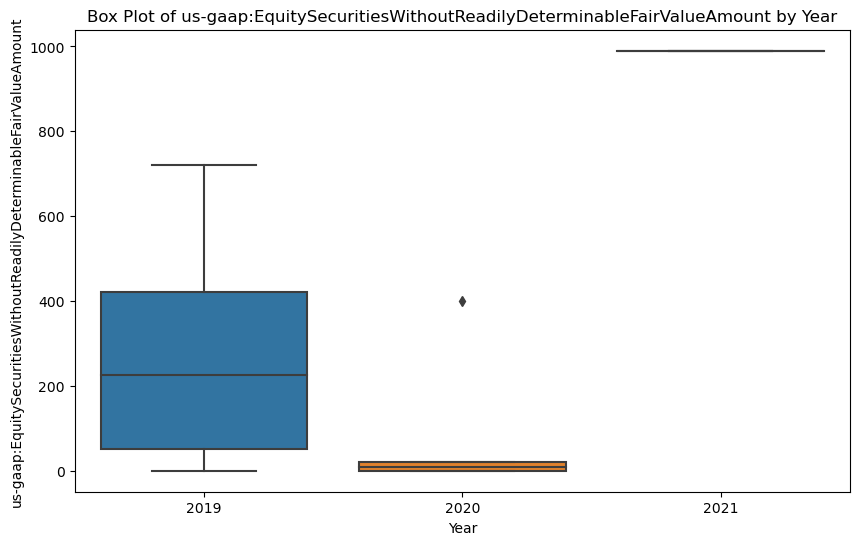

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate summary statistics for each year
summary_statistics = df_metric_pivot.describe()
print(summary_statistics)

# Visualization with box plots for the metric across years
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_metric_pivot)
plt.title(f'Box Plot of {metric_name} by Year')
plt.xlabel('Year')
plt.ylabel(metric_name)
plt.show()

In [12]:
# Drop companies with data in only one year as they are not suitable for trend analysis
companies_with_enough_data = df_metric_pivot.dropna(thresh=2)

# For companies with at least two data points, calculate the change from year to year
changes = {}

for company in companies_with_enough_data.index:
    # Get non-NaN values
    non_na_values = companies_with_enough_data.loc[company].dropna()
    if len(non_na_values) > 1:
        # Calculate the percentage change between the first and last non-NaN values
        first_year, last_year = non_na_values.index[0], non_na_values.index[-1]
        first_value, last_value = non_na_values.iloc[0], non_na_values.iloc[-1]
        percentage_change = ((last_value - first_value) / first_value) * 100
        changes[company] = {
            'first_year': first_year,
            'last_year': last_year,
            'first_value': first_value,
            'last_value': last_value,
            'percentage_change': percentage_change
        }

# Display the percentage changes
for company, data in changes.items():
    print(f"{company}: {data['percentage_change']}% change from {data['first_year']} to {data['last_year']}")

BIO-RAD LABORATORIES, INC.: -11.111111111111098% change from 2019 to 2020


In [13]:
# Fail to Build Regression Model

import numpy as np
from sklearn.linear_model import LinearRegression

# Create a list to store results
company_trends = []

# Loop through each company in the DataFrame
for index, row in df_metric_pivot.iterrows():
    # Get non-NaN year-value pairs
    year_value_pairs = row.dropna().reset_index()
    if len(year_value_pairs) > 1:
        # Fit a linear regression model
        reg_model = LinearRegression()
        X = year_value_pairs['docYear'].values.reshape(-1, 1)
        y = year_value_pairs.values
        reg_model.fit(X, y)

        # Store the slope and intercept
        company_trends.append({
            'company': index,
            'slope': reg_model.coef_[0][0],  # Rate of change
            'intercept': reg_model.intercept_[0]  # Starting point of the metric
        })

# Convert the results to a DataFrame for easy viewing
trend_df = pd.DataFrame(company_trends)
print(trend_df)

                      company  slope     intercept
0  BIO-RAD LABORATORIES, INC.    1.0  4.547474e-13


In [14]:
import pandas as pd
from scipy.stats import shapiro, f_oneway, kruskal

# List of metrics of interest
metrics_of_interest = [
    'us-gaap:EquitySecuritiesFvNi',
    'us-gaap:SharebasedCompensationArrangementBySharebasedPaymentAwardEquityInstrumentsOtherThanOptionsAggregateIntrinsicValueNonvested',
    'us-gaap:EquitySecuritiesWithoutReadilyDeterminableFairValueAmount',
    'us-gaap:DividendsPayableCurrentAndNoncurrent',
    'us-gaap:EquityMethodInvestmentOwnershipPercentage'
]

# Years of interest
years_of_interest = [2019, 2020, 2021]

# Initialize a DataFrame to store the results
results_df = pd.DataFrame(columns=['Metric', 'Test Statistic', 'p-value', 'Test Type'])

# Loop through each metric and perform the tests
for metric in metrics_of_interest:
    filtered_data = extracted_metrics[(extracted_metrics['metric'] == metric) &
                                      (extracted_metrics['docYear'].isin(years_of_interest))]
    data_by_year = {year: filtered_data[filtered_data['docYear'] == year]['value'].dropna() for year in years_of_interest}
    data_combined = np.concatenate([data_by_year[year] for year in years_of_interest])
    
    # Perform Shapiro-Wilk test for normality
    stat, p = shapiro(data_combined)
    
    if p > 0.05:
        # Data is normally distributed; use ANOVA
        test_result = f_oneway(*data_by_year.values())
        results_df = results_df.append({
            'Metric': metric,
            'Test Statistic': test_result.statistic,
            'p-value': test_result.pvalue,
            'Test Type': 'ANOVA'
        }, ignore_index=True)
    else:
        # Data is not normally distributed; use Kruskal-Wallis
        test_result = kruskal(*data_by_year.values())
        results_df = results_df.append({
            'Metric': metric,
            'Test Statistic': test_result.statistic,
            'p-value': test_result.pvalue,
            'Test Type': 'Kruskal-Wallis'
        }, ignore_index=True)

# Print the results DataFrame
results_df

/var/folders/_6/s0k4zqhd0_j70ztp6gds_ft00000gn/T/ipykernel_72995/3233812911.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/var/folders/_6/s0k4zqhd0_j70ztp6gds_ft00000gn/T/ipykernel_72995/3233812911.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/var/folders/_6/s0k4zqhd0_j70ztp6gds_ft00000gn/T/ipykernel_72995/3233812911.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/var/folders/_6/s0k4zqhd0_j70ztp6gds_ft00000gn/T/ipykernel_72995/3233812911.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.appen

,Metric,Test Statistic,p-value,Test Type
0,us-gaap:EquitySecuritiesFvNi,0.627451,0.730720,Kruskal-Wallis
1,us-gaap:SharebasedCompensationArrangementBySha...,3.200000,0.201897,Kruskal-Wallis
2,us-gaap:EquitySecuritiesWithoutReadilyDetermin...,7.349361,0.025358,Kruskal-Wallis
3,us-gaap:DividendsPayableCurrentAndNoncurrent,2.133333,0.344154,Kruskal-Wallis
4,us-gaap:EquityMethodInvestmentOwnershipPercentage,2.195926,0.333550,Kruskal-Wallis


# For Time Series Model

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'extracted_metrics' is your initial DataFrame and contains a 'docYearMonth' column and a 'metric' column
# Group by 'docYearMonth' and count the 'metric' occurrences
frequency_data = extracted_metrics.groupby('docYearMonth')['metric'].count().reset_index(name='frequency')
frequency_data

,docYearMonth,frequency
0,2019.09,9
1,2019.11,2
2,2019.12,133
3,2020.01,11
4,2020.02,3
5,2020.03,3
6,2020.07,2
7,2020.08,1
8,2020.09,7
9,2020.11,13


In [16]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Filter for equity-related metrics
equity_metrics = extracted_metrics[extracted_metrics['metric'].isin(equity_labels_list)]

# Aggregate the metrics by year
annual_aggregates = equity_metrics.groupby(['docYearMonth', 'metric']).agg({'value': 'sum'}).reset_index()

# Descriptive statistics
annual_descriptive_stats = annual_aggregates.groupby('docYearMonth')['value'].describe()
annual_descriptive_stats

,count,mean,std,min,25%,50%,75%,max
docYearMonth,,,,,,,,
2019.09,6.0,2.563567e+02,3.252620e+02,1.200,1.688000e+01,95.100,4.996000e+02,721.5
2019.11,1.0,4.640000e+01,NaN,46.400,4.640000e+01,46.400,4.640000e+01,46.4
2019.12,48.0,1.096008e+07,6.891347e+07,0.905,5.485500e+01,169.700,5.242875e+02,475877000.0
2020.01,7.0,1.115800e+02,1.662724e+02,2.200,6.800000e+00,9.400,1.509300e+02,454.0
2020.02,3.0,9.595467e+02,1.190668e+03,88.540,2.811700e+02,473.800,1.395050e+03,2316.3
2020.03,2.0,4.001000e+01,4.990760e+01,4.720,2.236500e+01,40.010,5.765500e+01,75.3
2020.07,1.0,1.300000e+00,NaN,1.300,1.300000e+00,1.300,1.300000e+00,1.3
2020.08,1.0,1.733000e+06,NaN,1733000.000,1.733000e+06,1733000.000,1.733000e+06,1733000.0
2020.09,3.0,4.505088e+05,7.791200e+05,320.900,6.836500e+02,1046.400,6.756027e+05,1350159.0


In [17]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Create a proper datetime index
# Split the 'docYearMonth' into separate year and month components
year_month = frequency_data['docYearMonth'].astype(str).str.split('.', expand=True)
frequency_data['year'] = year_month[0].astype(int)
frequency_data['month'] = year_month[1].astype(int)

# Generate a datetime object from the year and month
frequency_data['date'] = pd.to_datetime(frequency_data[['year', 'month']].assign(DAY=1))

# Set the new datetime as the index
frequency_data.set_index('date', inplace=True)

# Ensure the data is within the desired range from 2019 to 2021
frequency_data = frequency_data['2019':'2021']

# The key change: ensure the index has a monthly frequency
frequency_data = frequency_data.asfreq('M')

# Check if there are NaNs in the frequency column, which can't be handled by ARIMA
if frequency_data['frequency'].isnull().any():
    frequency_data['frequency'].fillna(method='ffill', inplace=True)  # or 'bfill'

# Fit an ARIMA model
model = ARIMA(frequency_data['frequency'], order=(1, 1, 1))
model_fit = model.fit()

# Print the model's summary
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:              frequency   No. Observations:                   24
Model:                 ARIMA(1, 1, 1)   Log Likelihood                   0.000
Date:                Sat, 13 Apr 2024   AIC                              6.000
Time:                        04:38:00   BIC                              9.406
Sample:                    09-30-2019   HQIC                             6.857
                         - 08-31-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1               0         -0        nan        nan           0           0
ma.L1               0         -0        nan        nan           0           0
sigma2         1.0000         -0       -inf      0.0

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/mlemodel.py:2979: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:1346: RuntimeWarning: invalid value encountered in true_divide
  test_statistic = numer_squared_sum / denom_squared_sum
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:681: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[: nlags + 1]